<img src='https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/banner_ikomia.png?raw=true'>




# How to run Neural Style Transfer with Ikomia API in less than 2 minutes

Neural Style Transfer is an AI technology which transforms your image in the style of another image. This technology was first introduced by researchers in the paper ["A Neural Style Algorithm of Artistic Style"](https://arxiv.org/abs/1508.06576) by Leon Gatsys et al. (2015).


In this demo, we use master paintings as style image and we show how it can be very easy to use this technology thanks to Ikomia API and Ikomia Hub. With a few lines of code, every developer can turn photos into artworks !

If you like this tutorial, you can support our project here [Ikomia API GitHub](https://github.com/Ikomia-dev/IkomiaApi).

## ENJOY 🥰 !!

<p float="left">
  <img src="https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/img_LR.jpg?raw=true" width="500" />
  <img src="https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/img_starry_night.jpg?raw=true" width="500" /> 
  <img src="https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/img_LR_vangogh.png?raw=true" width="1000" />
</p>

## Setup

You need to install Ikomia Python API with pip.

In [1]:
!pip install ikomia

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/home/yom/Developpement/python_venv/python3.7/bin/python -m pip install --upgrade pip' command.




---


**-Google Colab ONLY- Restart runtime**

Some Python packages have been updated. Please click on the "RESTART RUNTIME" button at the end the previous window.





---

Ikomia API has already more than 180 pre-integrated algorithms (mainly OpenCV) but the most interesting algorithms are in [Ikomia HUB](https://github.com/Ikomia-hub). 

We push regularly state-of-the-art algorithms from individual repos (think of YOLO v7 for example) or from companies (Facebook Detectron2 or Ultralytics/YOLOv5 for example).

That's why, you need to connect to Ikomia HUB when you want to download/install these algorithms.

If you like our open source project, you can join our community [here](https://members.ikomia.com/accounts/signup/) and get your own credentials !

In [2]:
import ikomia
import os

# Easy and unsafe authentication | Only for personal use
os.environ['IKOMIA_USER'] = "demo"
os.environ['IKOMIA_PWD'] = "jH4q72DApbRPa4k"

ikomia.authenticate()

Logging started at 2022-11-30 14:38:20
Algorithm demo_mix not loaded: invalid syntax (demo_mix_process.py, line 107)
Algorithm FaceMesh not loaded: No module named 'mediapipe'
Ikomia auto-completion updated for Ikomia HUB algorithms.


## Apply Neural Style Transfer (NST) on your images

Create a new workflow from scratch and add the NST algorithm to your workflow.
It will automagically download the algorithm from Ikomia Hub and install all the Python dependencies.

In [3]:
from ikomia.utils import ik
from ikomia.dataprocess import workflow

# Create your worflow
wf = workflow.create("NST workflow") 

# Add the NST algorithm to your workflow
nst_id, nst = wf.add_task(ik.infer_neural_style_transfer) 

Then, you can change the NST algorithm parameters in order to switch between paintings.

Get parameters from the NST algorithm and change the parameters to see different painting style.

The method "instance_norm" provides the following paintings:

* candy
* la_muse
* mosaic
* feathers
* the_scream
* udnie

The method "eccv16" provides the following paintings:

* the_wave
* starry_night
* la_muse
* composition_vii

The algorithm automatically downloads the model and the corresponding painting.

In [4]:
nst_params = {
    ik.infer_neural_style_transfer_param.method: "instance_norm", # <-- change method here
    ik.infer_neural_style_transfer_param.model: "candy" # <-- change painting here
}
wf.set_parameters(task_id=nst_id, params=nst_params)

# Connect the root task containing your input image to the NST algorithm
wf.connect_tasks(wf.getRootID(), nst_id) 

## Run and display your results

e355ed2_1652966874932-pns-3790466.jpg: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 63.0k/63.0k [00:00<00:00, 4.42MiB/s]


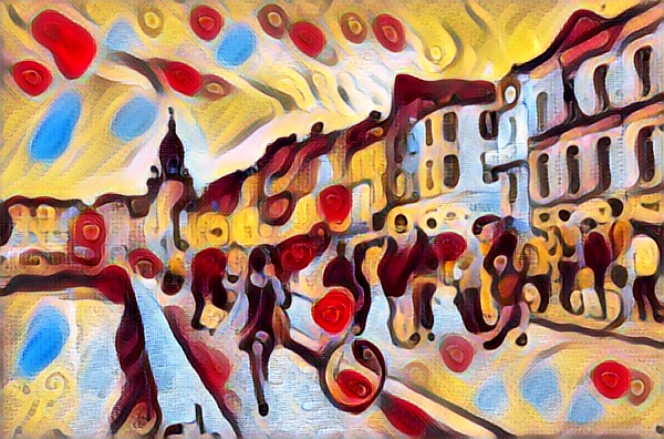

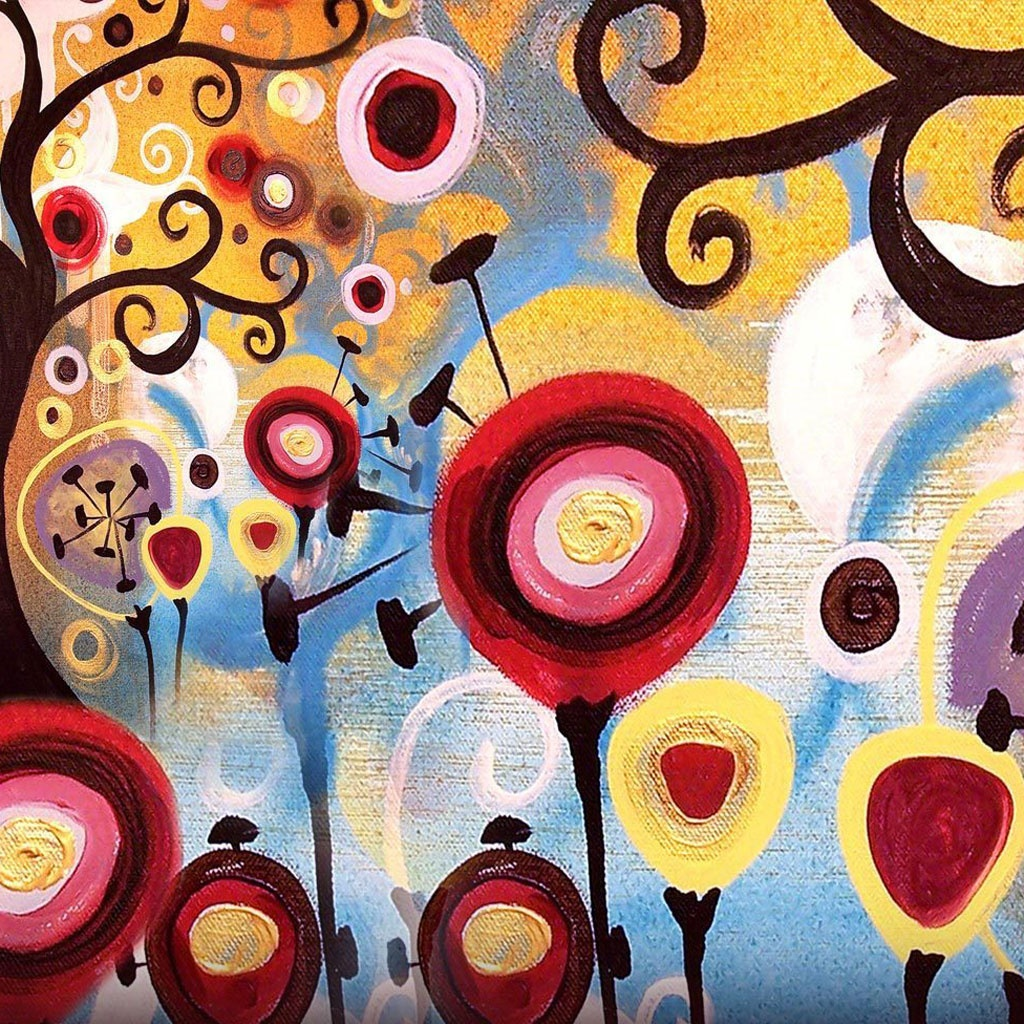

In [8]:
import cv2
import IPython
# Utility function for displaying image
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

# Run
wf.run_on(url="https://img.lemde.fr/2022/05/19/0/0/5571/3687/664/0/75/0/e355ed2_1652966874932-pns-3790466.jpg")  # <-- change input image

# Get NST image result
img_paint = wf.get_image(nst_id, index=0)*255 # First image is the result
img_model = wf.get_image(nst_id, index=1) # Second image is the reference painting

# Display images
img_paint = cv2.cvtColor(img_paint, cv2.COLOR_BGR2RGB)
img_model = cv2.cvtColor(img_model, cv2.COLOR_BGR2RGB)
imshow(img_paint)
imshow(img_model)

## -Google Colab ONLY- Save your custom image in your Google Drive space

In [ ]:
# Uncomment these lines if you're working on Colab
""" from google.colab import drive
drive.mount('/content/gdrive')

cv2.imwrite("/content/gdrive/MyDrive/paint_img.png", img_paint) """

## -Google Colab ONLY- Download directly your custom image

In [ ]:
# Uncomment these lines if you're working on Colab
""" from google.colab import files
cv2.imwrite("/content/paint_img.png", img_paint)
files.download('/content/paint_img.png') """